## Boombikes

Steps to be follow:
* 1. Import required packages.
* 2. Reading and understanding the data.
* 3. Preparing the data for modeling.
* 4. Model Building.
* 5. Residual Analysis.
* 6. Model Evaluation.

### Step_1: import packages.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE   

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


### <font color='white'>Step_2: Reading and understanding the data.<font/>

In [3]:
# Read dataframes from csv file.
boombike = pd.read_csv('day.csv', header=0)
boombike.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [4]:
# shape of the dataframe
boombike.shape

(730, 16)

In [5]:
# check the info of boombike dataframe
boombike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# check dif the dataset contain any null value
boombike.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Understanding data dictionary and convert the catagorical variable into some meaningful form.
def convert_seasons(x):
    return x.map({1: 'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
boombike[['season']] = boombike[['season']].apply(convert_seasons)
 

In [8]:
def convert_weekday(x):
    return x.map({6:'Mon', 0: 'Tue', 1:'Wed', 2:'Thu',3:'Fri',4:'Sat',5:'Sun'})
boombike['weekday'] = boombike[['weekday']].apply(convert_weekday)


In [9]:
print(boombike.weathersit.value_counts())
def convert_weathersit(x):
    return  x.map({1:'Clear', 2:'Cloudy', 3:'Thunderstorm'})
boombike.weathersit = boombike[['weathersit']].apply(convert_weathersit)


1    463
2    246
3     21
Name: weathersit, dtype: int64


In [10]:
def convert_mnth(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
boombike.mnth = boombike[['mnth']].apply(convert_mnth)
boombike.mnth

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [11]:
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### data visualization

### 1. Visualize Numerical Features

In [12]:
# list(zip(boombike.columns, boombike.columns.dtype)) 
numeric_col = ['cnt','casual','registered']
for col in boombike.columns:
    if  boombike[col].dtype == 'float64':
        numeric_col.append(col)
numeric_col

['cnt', 'casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed']

<Figure size 1500x900 with 0 Axes>

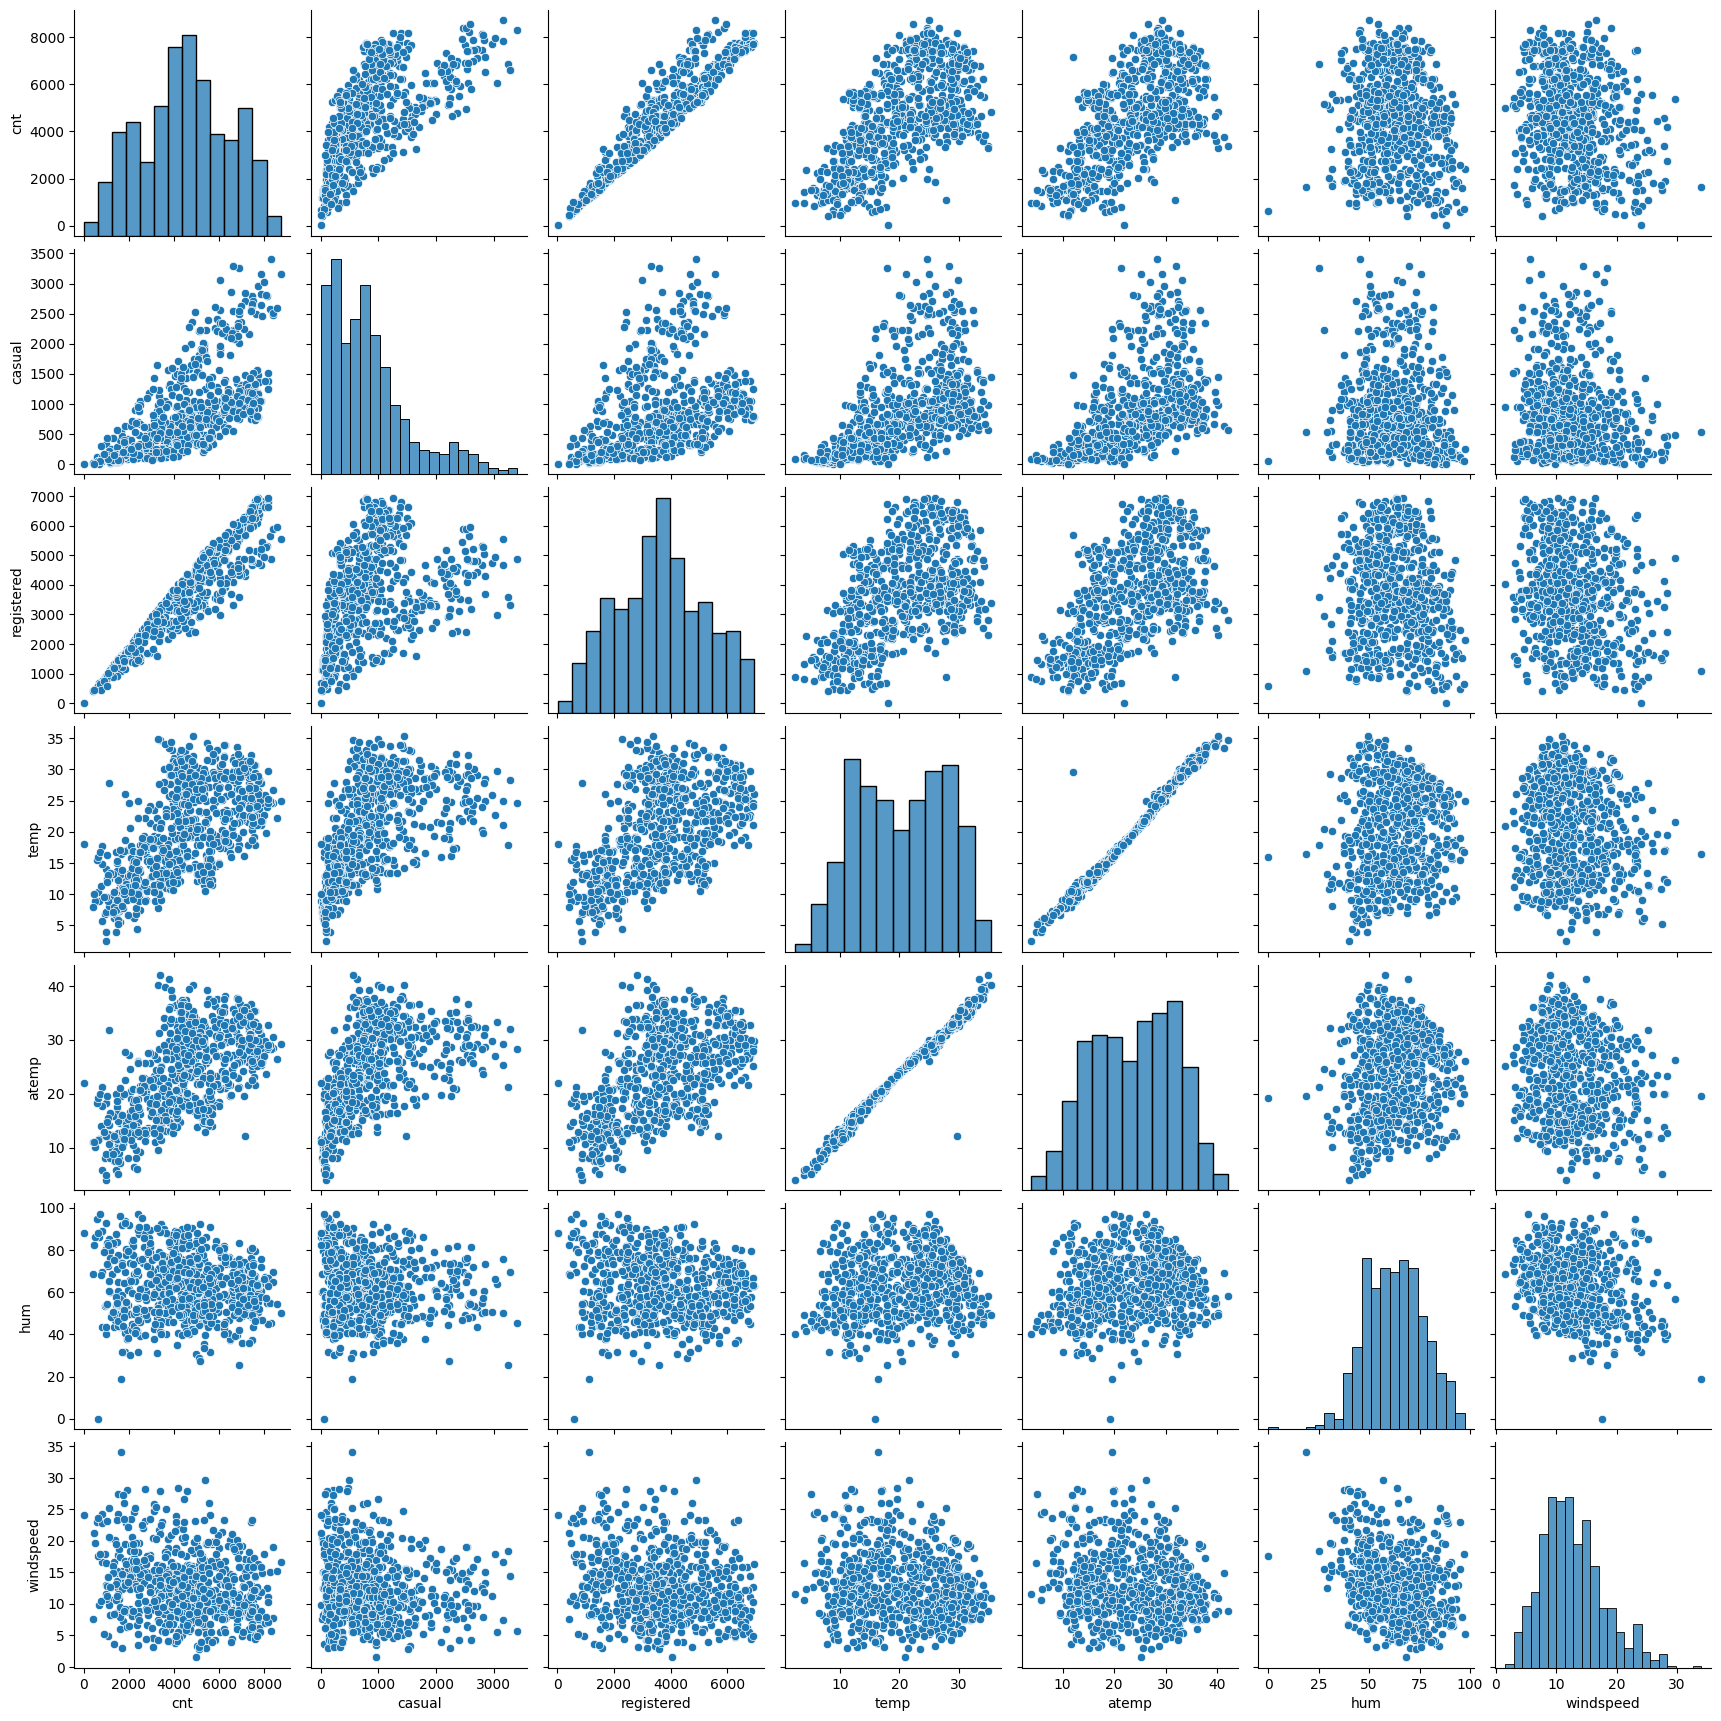

In [13]:
# lets visualize the nemeric column with scatterplot
plt.figure(figsize=(15,9))
sns.pairplot(boombike[numeric_col])

#### Insight: from the above paiplot we clearly see that ``registerd`` and ``casual`` column is highly correlated with each other as well as with ``cnt``. 

### 2. Visualize Categorical Features

<AxesSubplot: xlabel='weekday', ylabel='cnt'>

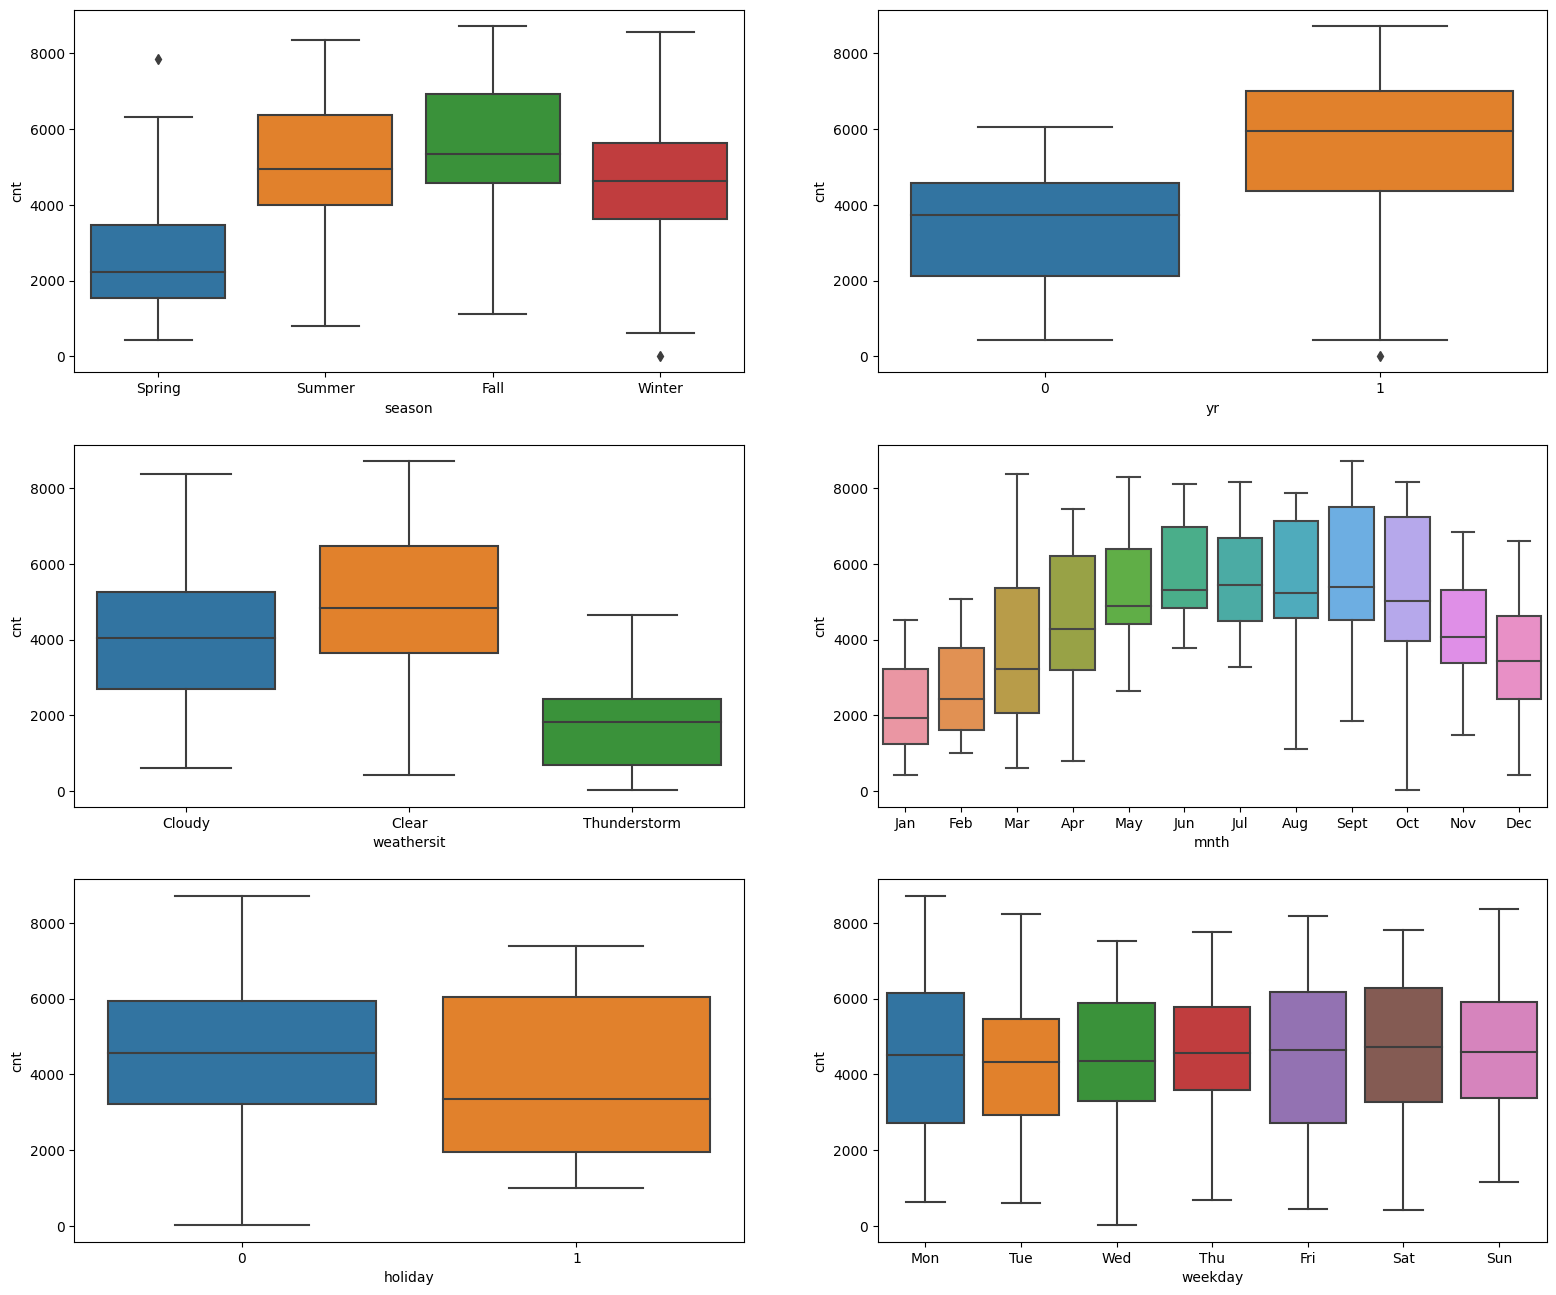

In [14]:
plt.figure(figsize=(19,16))
plt.subplot(3,2,1)
sns.boxplot(y='cnt', x='season', data=boombike)
plt.subplot(3,2,2)
sns.boxplot(y='cnt', x='yr', data=boombike)
plt.subplot(3,2,3)
sns.boxplot(y='cnt', x='weathersit', data=boombike)
plt.subplot(3,2,4)
sns.boxplot(y='cnt', x='mnth', data=boombike)
plt.subplot(3,2,5)
sns.boxplot(y='cnt', x='holiday', data=boombike)
plt.subplot(3,2,6)
sns.boxplot(y='cnt', x='weekday', data=boombike)

#### Insight: By visualizing the above boxplot we say that target variable ``cnt`` does not influence by ``weekday``.

<AxesSubplot: >

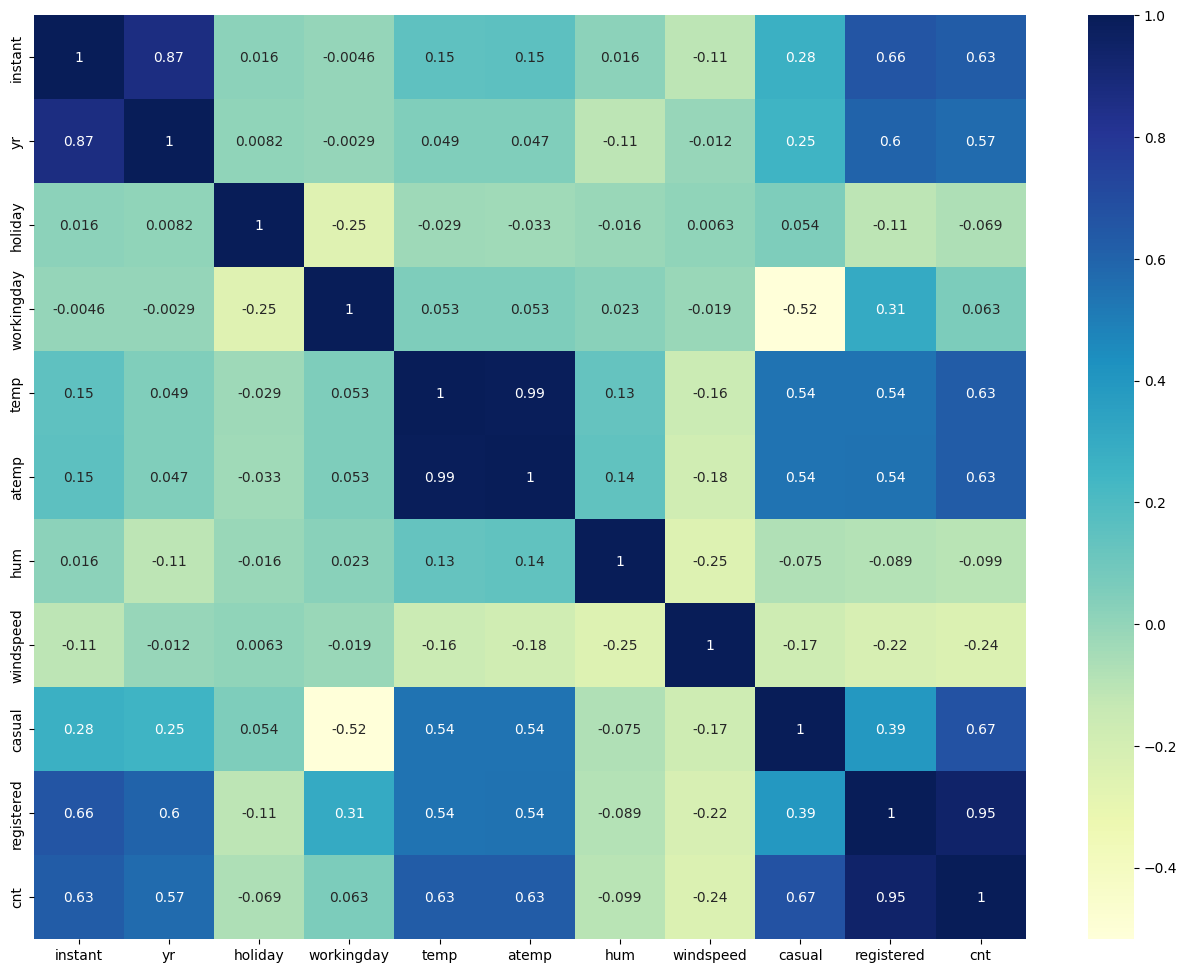

In [15]:
plt.figure(figsize=(16,12))
sns.heatmap(boombike.corr(), annot=True, cmap='YlGnBu')

#### Insight:
*  ``cnt`` is highly correlated with ``registered`` and ``casual`` features as cnt itself derived from them. ( we will drop these column for further analysis ).
*  ``temp`` and ``atemp`` is higly correlated with eachother. ( we will kept ``temp`` feature only ).

In [ ]:
# drop unnecessary column such as instant, atemp, dteday, casual and register
boombike = boombike.drop(['dteday','instant','dteday','atemp', 'casual', 'registered'], axis=1)

### <font color='white'>Step_3: Preparing the data for modelling.<font/>

- Encoding :
    - categorical variable ``weathersit``.
    - categorical variable ``season``.
    - categorical variable ``mnth``.
    - categorical variable ``weekday``.

In [17]:
# get the specific column which need to be encoded for further analysis.
encoding_col = [col for col in boombike.columns if boombike[col].dtype == 'object']
encoding_col

['season', 'mnth', 'weekday', 'weathersit']

#### Dummy Variable

In [18]:
# create the dummy variable
dummies = pd.get_dummies(boombike[encoding_col], drop_first=True)   
dummies.head(3)


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# concat dummies with original one 
boombike = pd.concat([boombike, dummies], axis=1)


In [20]:
# drop the original column
boombike = boombike.drop(boombike[encoding_col], axis=1)
boombike.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### <font color="magenta">Train_Test Split<font/>

In [21]:
# Train Test split
df_train, df_test = train_test_split(boombike, train_size=0.7, random_state=100)
print(f'Train Set: {df_train.shape}')
print(f'Test Set: {df_test.shape}')

Train Set: (510, 29)
Test Set: (220, 29)


#### <font color="magenta">Scalling<font/>

In [22]:
# instantiate MinMaxScaler object
scaler = MinMaxScaler()

num_features = ['cnt', 'temp','hum','windspeed']

df_train[num_features] = scaler.fit_transform(df_train[num_features])

df_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
np.asarray(df_train)
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color='white'>Step_4: Model Building.<font/>

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Base Model

In [25]:
# add const
X_train_sm = sm.add_constant(X_train)
# learn the model
lm = sm.OLS(y_train, X_train_sm)
# fit the model
lm_model = lm.fit()

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.00e-181
Time:                        10:31:38   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2409      0.036      6.786      0.000       0.171       0.311
yr                          0.2324      0.008     28.819      0.000       0.217       0.248
holiday                     0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                  0.0929      0.012      7.707      0.000       0.069       0.117
temp                        0.4454      0.046      9.628      0.000       0.354       0.536
hum                        -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                  -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_Spring              -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_Summer               0.0430      0.026      1.645      0.101      -0.008       0.094
season_Winter               0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                    0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                   -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                   -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                   -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_Jul                   -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_Jun                    0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar                    0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                    0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                   -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                    0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept                   0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon                 0.0978      0.014      7.231      0.000       0.071       0.124
weekday_Sat                -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_Sun                 0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_Thu                -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_Tue                 0.0435      0.014      3.173      0.002       0.017       0.070
weekday_Wed                -0.0154      0.015     -1.057      0.291      -0.044       0.013
weathersit_Cloudy          -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_Thunderstorm    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:      

Base Model: has Adj. R-squared of ``84.4%``, but there are lots of feature are seems to be insignificant and they need to be dropped.

#### RFE (Recursive Feature Elimination)

> using RFE we can ranked the features based on their significance in automated way.

In [26]:
# RFE with first 12 feature
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=12 )

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [27]:
rank_feature = pd.DataFrame()
rank_feature['Feature'] = X_train.columns
rank_feature['Supported'] =  rfe.support_
rank_feature['Ranking']= rfe.ranking_

In [28]:
rank_feature[rank_feature.Supported == True ]

,Feature,Supported,Ranking
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,True,1
4,hum,True,1
5,windspeed,True,1
6,season_Spring,True,1
13,mnth_Jul,True,1
20,weekday_Mon,True,1
24,weekday_Tue,True,1


### Model_1

In [29]:
supp_col = rank_feature[rank_feature.Supported == True ]['Feature']

# add const
X_train_sm1 = sm.add_constant(X_train[supp_col])

# learn the model
lm1 = sm.OLS(y_train, X_train_sm1)

# fit the model
lm_model1 = lm1.fit()

lm_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.01e-185
Time:                        10:31:38   Log-Likelihood:                 493.89
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     498   BIC:                            -913.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2789      0.024     11.434      0.000       0.231       0.327
yr                          0.2324      0.008     27.800      0.000       0.216       0.249
holiday                     0.0100      0.022      0.461      0.645      -0.033       0.053
workingday                  0.0996      0.009     10.592      0.000       0.081       0.118
temp                        0.4195      0.026     16.202      0.000       0.369       0.470
hum                        -0.1098      0.038     -2.881      0.004      -0.185      -0.035
windspeed                  -0.1829      0.026     -6.986      0.000      -0.234      -0.131
season_Spring              -0.1486      0.012    -12.073      0.000      -0.173      -0.124
mnth_Jul                   -0.0890      0.017     -5.127      0.000      -0.123      -0.055
weekday_Mon                 0.1115      0.012      9.630      0.000       0.089       0.134
weekday_Tue                 0.0579      0.012      4.756      0.000       0.034       0.082
weathersit_Cloudy          -0.0633      0.011     -5.884      0.000      -0.084      -0.042
weathersit_Thunderstorm    -0.2460      0.027     -9.048      0.000      -0.299      -0.193
==============================================================================
Omnibus:                       49.486   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.376
Skew:                          -0.533   Prob(JB):                     6.53e-25
Kurtosis:                       5.027   Cond. No.                     6.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
a = X_train_sm1.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.VIF = round(vif.VIF, 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,36.02
8,weekday_Mon,8.79
9,weekday_Tue,8.57
1,holiday,2.31
3,temp,2.01
4,hum,1.82
6,season_Spring,1.64
10,weathersit_Cloudy,1.54
7,mnth_Jul,1.26
11,weathersit_Thunderstorm,1.24


### Model_2

In [31]:
X_train_sm2 = X_train_sm1.drop('holiday',axis=1)

lm2 = sm.OLS(y_train, X_train_sm2)

lm_model2 = lm2.fit()
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.01e-185
Time:                        10:31:38   Log-Likelihood:                 493.89
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     498   BIC:                            -913.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2890      0.039      7.374      0.000       0.212       0.366
yr                          0.2324      0.008     27.800      0.000       0.216       0.249
workingday                  0.0896      0.026      3.393      0.001       0.038       0.141
temp                        0.4195      0.026     16.202      0.000       0.369       0.470
hum                        -0.1098      0.038     -2.881      0.004      -0.185      -0.035
windspeed                  -0.1829      0.026     -6.986      0.000      -0.234      -0.131
season_Spring              -0.1486      0.012    -12.073      0.000      -0.173      -0.124
mnth_Jul                   -0.0890      0.017     -5.127      0.000      -0.123      -0.055
weekday_Mon                 0.1014      0.028      3.631      0.000       0.047       0.156
weekday_Tue                 0.0478      0.028      1.705      0.089      -0.007       0.103
weathersit_Cloudy          -0.0633      0.011     -5.884      0.000      -0.084      -0.042
weathersit_Thunderstorm    -0.2460      0.027     -9.048      0.000      -0.299      -0.193
==============================================================================
Omnibus:                       49.486   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.376
Skew:                          -0.533   Prob(JB):                     6.53e-25
Kurtosis:                       5.027   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
a = X_train_sm2.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.VIF = round(vif.VIF, 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,24.09
1,workingday,16.33
2,temp,12.53
4,windspeed,4.47
7,weekday_Mon,4.40
8,weekday_Tue,4.30
9,weathersit_Cloudy,2.18
0,yr,2.06
5,season_Spring,1.97
6,mnth_Jul,1.36


### Model_3

In [33]:
X_train_sm3 = X_train_sm2.drop('weekday_Tue', axis=1)

lm3 = sm.OLS(y_train, X_train_sm3)
lm_model3 = lm3.fit()

lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.58e-185
Time:                        10:31:38   Log-Likelihood:                 492.40
No. Observations:                 510   AIC:                            -962.8
Df Residuals:                     499   BIC:                            -916.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3287      0.032     10.416      0.000       0.267       0.391
yr                          0.2325      0.008     27.769      0.000       0.216       0.249
workingday                  0.0489      0.011      4.321      0.000       0.027       0.071
temp                        0.4202      0.026     16.198      0.000       0.369       0.471
hum                        -0.1092      0.038     -2.859      0.004      -0.184      -0.034
windspeed                  -0.1830      0.026     -6.976      0.000      -0.235      -0.131
season_Spring              -0.1490      0.012    -12.084      0.000      -0.173      -0.125
mnth_Jul                   -0.0878      0.017     -5.055      0.000      -0.122      -0.054
weekday_Mon                 0.0608      0.015      4.164      0.000       0.032       0.090
weathersit_Cloudy          -0.0630      0.011     -5.846      0.000      -0.084      -0.042
weathersit_Thunderstorm    -0.2455      0.027     -9.013      0.000      -0.299      -0.192
==============================================================================
Omnibus:                       53.746   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.518
Skew:                          -0.562   Prob(JB):                     3.36e-28
Kurtosis:                       5.166   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
a = X_train_sm3.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.VIF = round(vif.VIF, 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,16.01
2,temp,11.94
1,workingday,4.62
4,windspeed,4.01
8,weathersit_Cloudy,2.10
0,yr,2.04
5,season_Spring,1.88
7,weekday_Mon,1.81
6,mnth_Jul,1.36
9,weathersit_Thunderstorm,1.19


### model_4

In [35]:
X_train_sm4 = X_train_sm3.drop('hum', axis=1)

lm4 = sm.OLS(y_train,X_train_sm4)
lm_model4 = lm4.fit()
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          5.34e-185
Time:                        10:31:38   Log-Likelihood:                 488.26
No. Observations:                 510   AIC:                            -956.5
Df Residuals:                     500   BIC:                            -914.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2600      0.021     12.618      0.000       0.220       0.300
yr                          0.2350      0.008     28.021      0.000       0.219       0.252
workingday                  0.0512      0.011      4.503      0.000       0.029       0.074
temp                        0.4072      0.026     15.830      0.000       0.357       0.458
windspeed                  -0.1602      0.025     -6.364      0.000      -0.210      -0.111
season_Spring              -0.1469      0.012    -11.850      0.000      -0.171      -0.123
mnth_Jul                   -0.0821      0.017     -4.721      0.000      -0.116      -0.048
weekday_Mon                 0.0642      0.015      4.376      0.000       0.035       0.093
weathersit_Cloudy          -0.0805      0.009     -9.015      0.000      -0.098      -0.063
weathersit_Thunderstorm    -0.2769      0.025    -11.035      0.000      -0.326      -0.228
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.281
Skew:                          -0.588   Prob(JB):                     4.21e-30
Kurtosis:                       5.232   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
a = X_train_sm4.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.VIF = round(vif.VIF, 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,6.06
1,workingday,4.30
3,windspeed,3.94
0,yr,2.04
6,weekday_Mon,1.74
4,season_Spring,1.63
7,weathersit_Cloudy,1.53
5,mnth_Jul,1.30
8,weathersit_Thunderstorm,1.07


<AxesSubplot: >

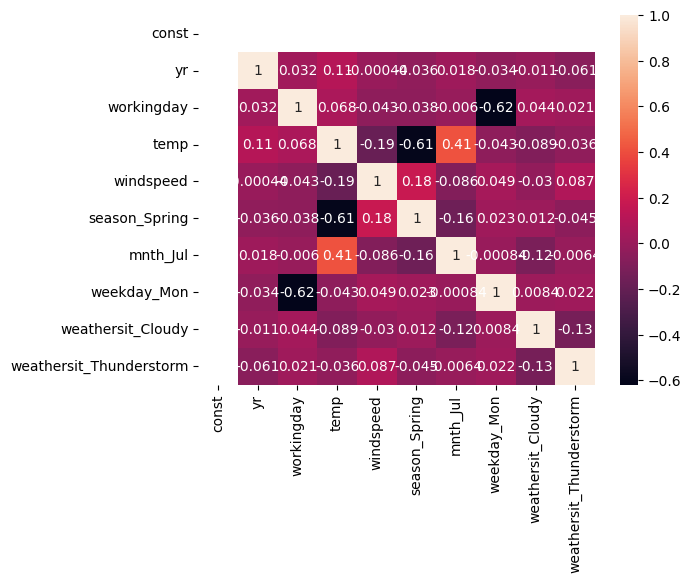

In [55]:
sns.heatmap(X_train_sm4.corr(), annot=True)

As we notice from above heatmap ``workingday`` and ``weekday_Mon`` is highly correlated. we need to drop any one of them.

### model 5

In [38]:
X_train_sm5 = X_train_sm4.drop('workingday', axis=1)

lm5 = sm.OLS(y_train,X_train_sm5)
lm_model5 = lm5.fit()
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     288.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          6.13e-182
Time:                        10:31:39   Log-Likelihood:                 478.12
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     501   BIC:                            -900.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2961      0.019     15.309      0.000       0.258       0.334
yr                          0.2354      0.009     27.545      0.000       0.219       0.252
temp                        0.4142      0.026     15.831      0.000       0.363       0.466
windspeed                  -0.1612      0.026     -6.285      0.000      -0.212      -0.111
season_Spring              -0.1461      0.013    -11.563      0.000      -0.171      -0.121
mnth_Jul                   -0.0843      0.018     -4.763      0.000      -0.119      -0.050
weekday_Mon                 0.0233      0.012      1.983      0.048       0.000       0.046
weathersit_Cloudy          -0.0776      0.009     -8.551      0.000      -0.095      -0.060
weathersit_Thunderstorm    -0.2704      0.026    -10.592      0.000      -0.321      -0.220
==============================================================================
Omnibus:                       61.354   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.691
Skew:                          -0.659   Prob(JB):                     3.43e-30
Kurtosis:                       5.156   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
a = X_train_sm5.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.VIF = round(vif.VIF, 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,4.23
2,windspeed,3.80
0,yr,2.03
3,season_Spring,1.52
6,weathersit_Cloudy,1.49
4,mnth_Jul,1.28
5,weekday_Mon,1.18
7,weathersit_Thunderstorm,1.06


As we notice from model_5 summary ``weekday_Mon`` variable is insignificant (P_value ~= 0.48). we need to drop that column to improve our model stability.

### Model 6

In [56]:

X_train_sm6 = X_train_sm5.drop('weekday_Mon', axis=1)

lm6 = sm.OLS(y_train,X_train_sm6)
lm_model6 = lm6.fit()
lm_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     326.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.31e-182
Time:                        10:51:33   Log-Likelihood:                 476.13
No. Observations:                 510   AIC:                            -936.3
Df Residuals:                     502   BIC:                            -902.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3001      0.019     15.551      0.000       0.262       0.338
yr                          0.2349      0.009     27.419      0.000       0.218       0.252
temp                        0.4126      0.026     15.730      0.000       0.361       0.464
windspeed                  -0.1591      0.026     -6.189      0.000      -0.210      -0.109
season_Spring              -0.1462      0.013    -11.544      0.000      -0.171      -0.121
mnth_Jul                   -0.0837      0.018     -4.712      0.000      -0.119      -0.049
weathersit_Cloudy          -0.0774      0.009     -8.507      0.000      -0.095      -0.060
weathersit_Thunderstorm    -0.2696      0.026    -10.532      0.000      -0.320      -0.219
==============================================================================
Omnibus:                       55.294   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.189
Skew:                          -0.572   Prob(JB):                     1.97e-29
Kurtosis:                       5.216   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
a = X_train_sm6.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.VIF = round(vif.VIF, 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,temp,4.19
2,windspeed,3.76
0,yr,2.03
3,season_Spring,1.51
5,weathersit_Cloudy,1.48
4,mnth_Jul,1.28
6,weathersit_Thunderstorm,1.06


We will finalized the model_6 for further prediction. as we don't see any variable shows insignificance and the VIF score is also below 5.

### <font color='white'>Step_5: Residual Analysis.<font/>

<Figure size 640x480 with 0 Axes>

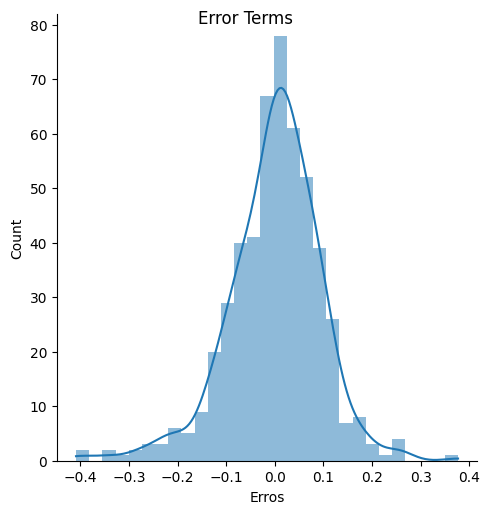

In [97]:
# lets analyze the residual before prediction on test data set.
y_train_pred = lm_model6.predict(X_train_sm6)
res = y_train - y_train_pred
plt.figure()
sns.displot(res, edgecolor=None, kde=True)
plt.suptitle('Error Terms')
plt.xlabel('Erros')
plt.show()

### <font color='white'>Step_6: Model Evaluation.<font/>
> #### Prediction on test data set


In [61]:
df_test.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Thunderstorm
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [63]:
df_test[num_features] = scaler.transform(df_test[num_features])
df_test[num_features].head(3)

,cnt,temp,hum,windspeed
184,0.692706,0.831783,0.657364,0.084219
535,0.712034,0.901354,0.610133,0.153728
299,0.303382,0.511964,0.837699,0.334206


In [66]:
#  column that we selected for final model
final_features = a.columns


In [68]:
# assign X_test and y_test from df_test set
y_test = df_test.pop('cnt')
X_test = df_test[final_features]

In [76]:
# test the model
#  add constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   const                    220 non-null    float64
 1   yr                       220 non-null    int64  
 2   temp                     220 non-null    float64
 3   windspeed                220 non-null    float64
 4   season_Spring            220 non-null    uint8  
 5   mnth_Jul                 220 non-null    uint8  
 6   weathersit_Cloudy        220 non-null    uint8  
 7   weathersit_Thunderstorm  220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.5 KB


In [77]:
# make prediction on test dataset
y_test_pred = lm_model6.predict(X_test_sm)

In [99]:
# check the R_2 Score for test set
r2 = r2_score(y_true=y_test, y_pred= y_test_pred)
print(f"R_2 Score for Test Set: {r2}")


R_2 Score for Test Set: 0.7984190893959867


> by comparing it with our training set, it is quite close.


| data_set | $ R^2 $ Score | 
| --- | --- | 
| Training | 0.82 | 
| Test | 0.80 | 

Text(37.722222222222214, 0.5, 'Y_Pred')

<Figure size 640x480 with 0 Axes>

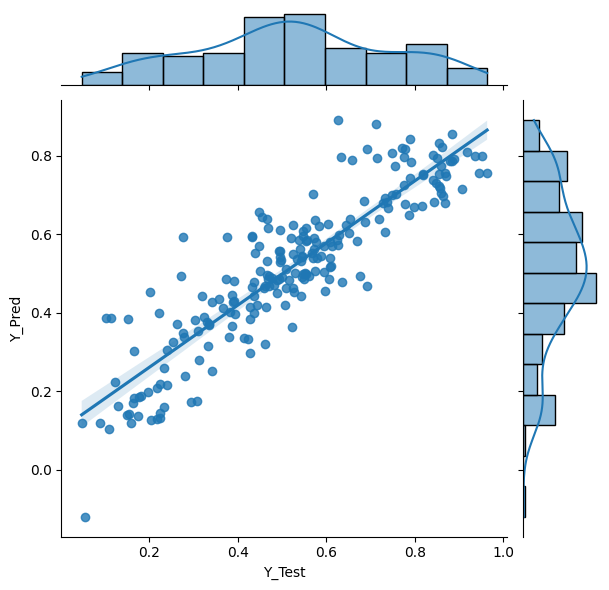

In [102]:
# plotting the y_test vs y_pred
plt.figure()
sns.jointplot(x =y_test, y= y_test_pred, kind='reg')
plt.xlabel('Y_Test')
plt.ylabel('Y_Pred')

### Equation 
$ y = 0.2349X_1 + 0.4126X_2 - 0.1591X_3 - 0.1462X_4 - 0.0837X_5 - 0.0774X_6 - 0.2696X_7 + 0.3001 $ </br>
Where:
 - y: ``cnt``
 - X1: ``yr``
 - X2: ``temp``
 - X3: ``windspeed``
 - X4: ``season_spring``
 - X5: ``mnth_jul``
 - X6: ``weathersit_cloudy``
 - X7: ``weathersit_thunderstorm``



 